<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bpractice%5D_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 차원 축소 알고리즘

[`sklearn.datasets.make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) 데이터셋을 활용해 차원 축소 알고리즘들을 적용해보겠습니다.    
다양한 알고리즘을 적용한 뒤, LogisticRegression 모델로 학습 후 평가해보세요.

In [80]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=40, n_informative=2, n_redundant=38, n_classes=2, n_clusters_per_class=1)
print(X.shape, y.shape)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

(1000, 40) (1000,)


## [P.1] Principal Component Analysis (PCA)

[`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) 알고리즘을 적용해서 데이터를 축소해봅시다.

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)


LogisticRegression()

In [82]:
y_pred = lr.predict(X_test)

train_loss = np.mean((y_test - y_pred)**2)

print(train_loss)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.0
1.0


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

model = Pipeline([('pcr', PCA(n_components=2)), ('lr', LogisticRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_loss = np.mean((y_test - y_pred)**2)

print(train_loss)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.0
1.0


In [84]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
    plt.show()

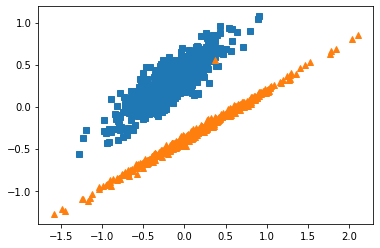

(1000, 40)

In [85]:
plot_dataset(X, y)
X.shape

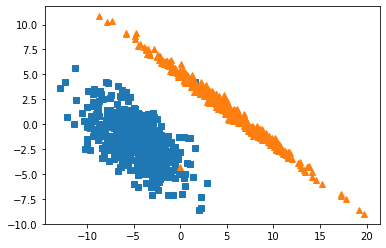

(1000, 2)

In [86]:
X_reduced = PCA(n_components=2).fit_transform(X)
plot_dataset(X_reduced, y)
X_reduced.shape

## [P.2] Linear Discriminant Analysis (LDA)

LDA는 `sklearn` 패키지가 최신으로 업데이트 되면서 `sklearn.lda.LDA`의 모델 형식의 클래스에서 [`sklearn.discriminant_analysis.LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)의 차원 축소 알고리즘 형태로 변모하였습니다.

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=1)), ('lr', LogisticRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_loss = np.mean((y_test - y_pred)**2)

print(train_loss)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.0
1.0


## [P.3] t-Stochastic Neighbor Embedding (TSNE)

[`t-SNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)를 사용하면 좀더 잘 정제된 차원 축소 데이터를 받을 수 있습니다.     
대신, t-SNE 알고리즘은 속도가 매운 느린 단점이 있으며, 축소할 수 있는 차원의 개수는 4개 이하로 정해져 있습니다.

In [88]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


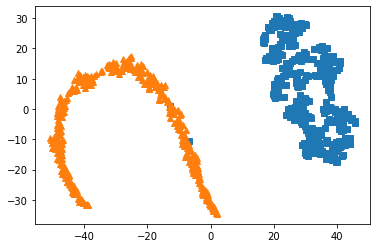

In [89]:
plot_dataset(X_train, y_train)

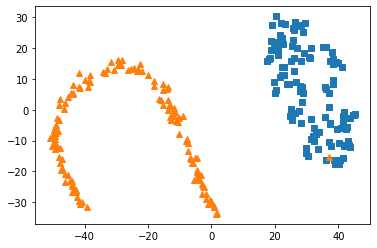

In [90]:
plot_dataset(X_test, y_test)

In [91]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.996

## [P.4] 데이터 압축 알고리즘 (SVD)

0 ~ 9 사이의 [숫자 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)을 통해, 데이터 압축 알고리즘인 SVD를 사용해보겠습니다.    
SVD는 numpy 패키지에서 제공하는 [`np.linalg.svd`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)를 사용해보겠습니다.

In [92]:
from sklearn.datasets import load_digits
asdf = load_digits().data 
print(asdf.shape, asdf)

(1797, 64) [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [93]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
print(X.shape, y.shape, X, y)

(1797, 64) (1797,) [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [94]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

(1797, 64) (1797,)


In [95]:
y

array([0, 1, 2, ..., 8, 9, 8])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


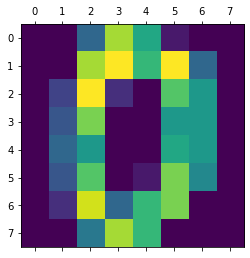

In [96]:
sample = X[0].reshape((8, 8))
print(sample)
plt.matshow(sample)

In [97]:
np.random.rand(4,2)

array([[0.16954638, 0.78340971],
       [0.90060318, 0.91624015],
       [0.08727686, 0.07451019],
       [0.90129432, 0.70433459]])

In [ ]:
np.random.randn(9, 6)

In [ ]:
a = np.random.randn(9, 6) + 1j*np.random.randn(9, 6)
a

In [109]:
a = np.random.rand(4,2)
U, s, V = np.linalg.svd(a)
print(a)
print(s)

[[0.44551511 0.04498496]
 [0.94217126 0.55016507]
 [0.98745036 0.25030233]
 [0.57941806 0.19587804]]
[1.65614214 0.2446872 ]


In [101]:
x = np.arange(9).reshape((3,3))
x
x_diag = np.diag(x)
x_diag

array([0, 4, 8])

In [113]:
# SVD 역으로 진행
S = np.zeros((4, 2))
print(S)
print(np.diag(s))
S[:2, :2] = np.diag(s)
print(S)

U.dot(S.dot(V))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.65614214 0.        ]
 [0.         0.2446872 ]]
[[1.65614214 0.        ]
 [0.         0.2446872 ]
 [0.         0.        ]
 [0.         0.        ]]


array([[0.44551511, 0.04498496],
       [0.94217126, 0.55016507],
       [0.98745036, 0.25030233],
       [0.57941806, 0.19587804]])

In [114]:
# sample에 대한 SVD
print(sample.shape)
U, s, V = np.linalg.svd(sample)

print(U.shape, s.shape, V.shape)

(8, 8)
(8, 8) (8,) (8, 8)


In [116]:
# SVD reconstruction
S = np.zeros((8, 8))
print(S)
print(s)
S[:8, :8] = np.diag(s)
print(S)

# 압축하고 싶은 차원의 수
dim = 4

S = S[:, :dim]
V = V[:dim, :]
sample_svd = U.dot(S.dot(V))
print(sample_svd.shape)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[48.307845   24.95585264  8.02075326  6.02937301  3.53447932  0.61576328
  0.          0.        ]
[[48.307845    0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         24.95585264  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          8.02075326  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          6.02937301  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          3.53447932  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.61576328
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.        

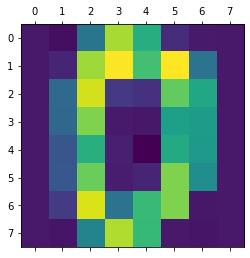

In [117]:
plt.matshow(sample_svd)